In [5]:
from src.data_preprocessor import load_and_process_data, aggregate_to_yearly, filter_data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px

In [6]:
df = load_and_process_data()

2023-11-11 14:34:44,910 - INFO - Loading the latest recent file: data/lsoa-recent.csv
2023-11-11 14:34:45,157 - INFO - Loading the latest historical file: data/lsoa-historical.csv


In [7]:
# Sort data by columns and create an aggregated yearly dataset
df = df.sort_index(axis = 1).fillna(0)
yearly_df = aggregate_to_yearly(df).sort_index(axis=1)

In [15]:
def group_by(df: pd.DataFrame, columns : list = ['Borough'], agg_func :str ='sum', sort : bool =False) -> pd.DataFrame:
    '''
    Groups a DataFrame by specified column(s) and applies an aggregation function.

    :params df (pd.DataFrame): The DataFrame to group.
    :params columns (str or list): The column(s) to group by.
    :params agg_func (str or dict, optional): The aggregation function(s) to apply. Default is 'sum'.
    :params sort (bool, optional): Whether to sort the grouped data. Default is False.

    :returns pd.DataFrame: The grouped DataFrame.
    '''
    # Ensure columns is a list for consistency
    if isinstance(columns, str):
        columns = [columns]

    # Check if all columns are in DataFrame
    missing_columns = [col for col in columns if col not in df.columns]
    if missing_columns:
        logger.error(f'Column(s) {", ".join(missing_columns)} not found in dataset')
        return None

    grouped_df = df.groupby(by=columns).agg(agg_func)

    if sort:
        grouped_df = grouped_df.sort_values(by=columns)

    return grouped_df

# Example Usage
group_by(df, columns = ['Borough', 'Major Category'])

201004  201005  \
Borough              Major Category                                         
Barking and Dagenham Arson and Criminal Damage              215.0   195.0   
                     Burglary                               165.0   159.0   
                     Drug Offences                           85.0    70.0   
                     Miscellaneous Crimes Against Society    22.0    13.0   
                     Possession of Weapons                   22.0    13.0   
...                                                           ...     ...   
Westminster          Public Order Offences                   83.0    81.0   
                     Robbery                                149.0   139.0   
                     Theft                                 2779.0  2733.0   
                     Vehicle Offences                       313.0   274.0   
                     Violence Against the Person            546.0   598.0   

                                                           201006  201007  \
Borough              Major Category                                         
Barking and Dagenham Arson and Criminal Damage              236.0   228.0   
                     Burglary                               181.0   183.0   
                     Drug Offences                           87.0    82.0   
                     Miscellaneous Crimes Against Society    15.0    13.0   
                     Possession of Weapons                   12.0    16.0   
...                                                           ...     ...   
Westminster          Public Order Offences                  126.0   119.0   
                     Robbery                                126.0   104.0   
                     Theft                                 2620.0  3061.0   
                     Vehicle Offences                       251.0   252.0   
                     Violence Against the Person            629.0   657.0   

                                                           201008  201009  \
Borough              Major Category                                         
Barking and Dagenham Arson and Criminal Damage              210.0   168.0   
                     Burglary                               199.0   187.0   
                     Drug Offences                          107.0    95.0   
                     Miscellaneous Crimes Against Society    17.0    13.0   
                     Possession of Weapons                    4.0    11.0   
...                                                           ...     ...   
Westminster          Public Order Offences                  109.0    99.0   
                     Robbery                                100.0   161.0   
                     Theft                                 2702.0  2628.0   
                     Vehicle Offences                       223.0   277.0   
                     Violence Against the Person            586.0   573.0   

                                                           201010  201011  \
Borough              Major Category                                         
Barking and Dagenham Arson and Criminal Damage              209.0   188.0   
                     Burglary                               169.0   202.0   
                     Drug Offences                          119.0   119.0   
                     Miscellaneous Crimes Against Society    21.0    16.0   
                     Possession of Weapons                    6.0    12.0   
...                                                           ...     ...   
Westminster          Public Order Offences                   93.0   118.0   
                     Robbery                                175.0   142.0   
                     Theft                                 2967.0  2862.0   
                     Vehicle Offences                       278.0   254.0   
                     Violence Against the Person            601.0   558.0   

                                                   

In [44]:
def get_yearly_trends(df, columns : list = ['Borough', 'Major Category'], agg_func : str = 'sum', crimes : list = ['Theft']):
    
    grouped_by_borough = group_by(df = df, columns = columns, agg_func=agg_func, sort = True)
    yearly_by_borough = aggregate_to_yearly(grouped_by_borough).sort_index(axis = 1)

    # Filtered data by borough and by crime
    filted_data = filter_data(df = yearly_by_borough.reset_index(), column='Major Category', category_filters = crimes).reset_index(drop = True)
    yearly_data_sums = filted_data.drop(columns = ['Borough', 'Major Category']).sum()

    return yearly_data_sums


# Example Usage
crimes = ['Theft', 'Burglary']
yearly_sums = get_yearly_trends(df = df, crimes = crimes, agg_func='sum')
yearly_sums

2010    240728.0
2011    330878.0
2012    332648.0
2013    305019.0
2014    274775.0
2015    272804.0
2016    273668.0
2017    298041.0
2018    298947.0
2019    327953.0
2020    229369.0
2021    229962.0
2022    278994.0
2023    223022.0
dtype: float64

2023-11-11 14:49:20,532 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-11 14:49:20,540 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


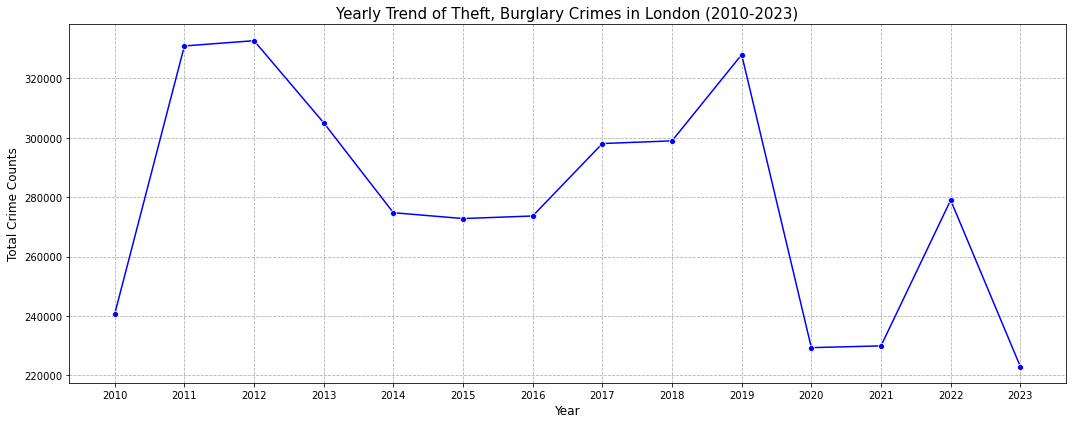

In [45]:
# Line Chart: Yearly trend of violent crimes for the entire city of London
plt.figure(figsize=(15, 6))
sns.lineplot(x=yearly_sums.index, y=yearly_sums.values, marker="o", color="b")
plt.title(f'Yearly Trend of {", ".join(str(crime) for crime in crimes)} Crimes in London (2010-2023)', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Crime Counts', fontsize=12)
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

In [25]:
yearly_sums.index.values

array(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023'], dtype=object)

In [26]:


fig = px.line(yearly_sums, x=yearly_sums.index.values, y=yearly_sums.values,
              markers=True, title='Yearly Trend of Violent Crimes in London (2010-2023)',
              labels={'x': 'Year', 'y': 'Total Crime Counts'})

fig.update_layout(xaxis_title='Year',
                  yaxis_title='Total Crime Counts',
                  xaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightPink'),
                  yaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightBlue'),
                  plot_bgcolor='white')

fig.show()